In [12]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("spam.csv", encoding= "ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis= 1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.columns = ["labels", "data"]
data.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data["labels"] = data.labels.map({"ham":0, "spam":1})
y = data["labels"].as_matrix()

C:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
countVect = CountVectorizer(decode_error="ignore")
X = countVect.fit_transform(data["data"])

In [7]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.3)

In [8]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(Xtrain, ytrain)
model.score(Xtest, ytest)

0.9802631578947368

In [13]:
def visualize(label):
    words = ''
    for msg in data[data["labels"] == label]["data"]:
        msg = msg.lower()
        words += msg + " "
    wordcloud = WordCloud(width= 600, height= 400).generate(words)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

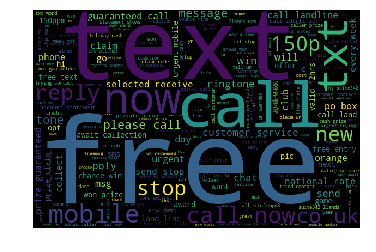

In [14]:
visualize(1)

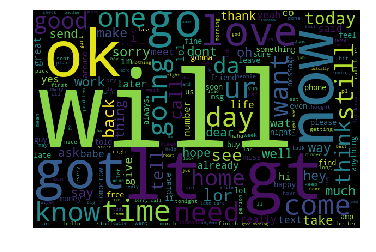

In [15]:
visualize(0)

In [16]:
data["predictions"] = model.predict(X)

In [17]:
sneaky_spam = data[(data["predictions"] == 0) & (data["labels"] == 1)]["data"]
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Filthy stories and GIRLS waiting for your
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you respond you get further prem rate msg/subscription. Other nos used also. Beware!
Babe: U want me dont u baby! Im nasty and have a thing 4 filthyguys. Fancy 

In [18]:
not_actually_spam = data[(data["predictions"] == 1) & (data["labels"] == 0)]["data"]
for msg in not_actually_spam:
    print(msg)

Gudnite....tc...practice going on
Gudnite....tc...practice going on
Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Im in inperialmusic listening2the weirdest track ever byåÓleafcutter johnåÓ-sounds like insects being molested&someone plumbing,remixed by evil men on acid!
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Yalru lyfu astne chikku.. Bt innu mundhe lyf ali halla ke bilo (marriage)program edhae, so lyf is nt yet ovr chikku..ali vargu lyfu meow meow:-D
V-aluable. A-ffectionate. L-oveable. E-ternal. N-oble. T-ruthful. I-ntimate. N-atural. E-namous. Happy \VALENTINES DAY\" in advance"
Waqt se pehle or naseeb se zyada kisi ko kuch nahi milta,Zindgi wo nahi he jo hum sochte hai Zindgi wo hai jo ham jeetey hai..........
Tiwary to rcb.battle between bang and kochi.
\NONE!NOWHERE IKNO DOESDISCOUNT!SHITINNIT\""
Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway